# Imports and helper functions

In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap
from sklearn.datasets import load_iris, load_boston
from sklearn.manifold import TSNE

In [2]:
metrics = ['euclidean', 'manhattan', 'mahalanobis', 'chebyshev', 'minkowski']
colors = ['C{}'.format(i) for i in range(10)]

def compute_plot_iris(data, nrows=1, **kwargs):
    num_classes = len(np.unique(data['target']))
    cmap = LinearSegmentedColormap.from_list('', colors[:num_classes])
    fig, axes = plt.subplots(nrows, len(metrics), figsize=(11, 2*nrows), dpi=100)
    axes = axes.reshape(nrows, -1)
    for i in range(nrows):
        if nrows > 1:
            axes[i, 0].set_ylabel('Try {}'.format(i + 1))
        for j, metric in enumerate(metrics):
            if i == 0:
                axes[i, j].set_title(metric)
            model = TSNE(metric=metric, **kwargs)
            embedding = model.fit_transform(data['data'])
            axes[i][j].scatter(embedding.T[0], embedding.T[1], c=data['target'],
                               cmap=cmap, s=5)
            
            
def compute_plot_houses(data, numbers=[5, 10, 50, 100, 500], **kwargs):
    cmap = get_cmap('viridis')
    colors = houses['target'] / houses['target'].max()
    fig, axes = plt.subplots(1, len(numbers), figsize=(11, 2), dpi=100)
    for idx, num in enumerate(numbers):
        axes[idx].set_xlabel(num)
        model = TSNE(perplexity=num, **kwargs)
        embedding = model.fit_transform(data['data'])
        axes[idx].scatter(embedding.T[0], embedding.T[1], c=colors,
                          cmap=cmap, s=5)
    fig.suptitle('Different values of perplexity')

# How easy is it to run?

In [3]:
# load data
iris = load_iris()

# make model and compute embedding
model = TSNE()
embedding = model.fit_transform(iris['data'])

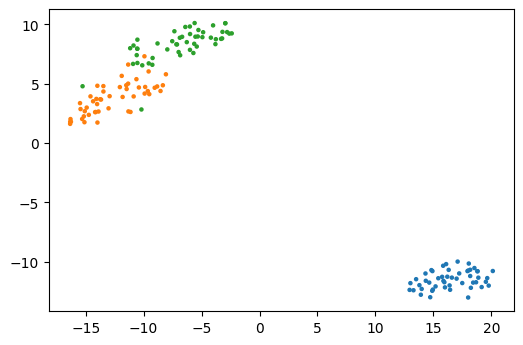

In [4]:
cmap = LinearSegmentedColormap.from_list('', colors[:len(np.unique(iris['target']))])
plt.figure(dpi=100)
plt.scatter(embedding.T[0], embedding.T[1], c=iris['target'], cmap=cmap, s=5)

# Iris data set

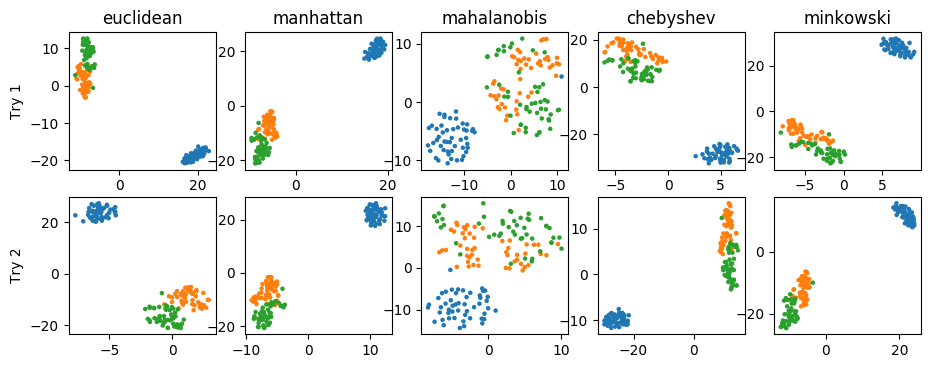

In [5]:
iris = load_iris()
compute_plot_iris(iris, nrows=2)

# Boston house prices

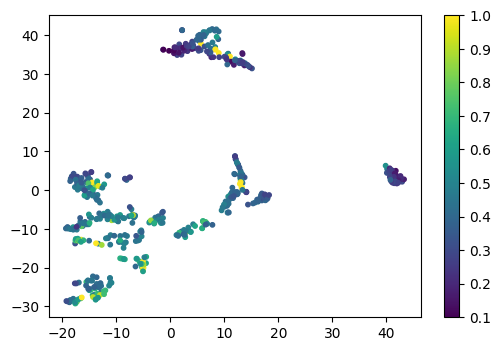

In [6]:
# load data set
houses = load_boston()

#get model and compute
model = TSNE()
embedding = model.fit_transform(houses['data'])

# plot
cmap = get_cmap('viridis')
colors = houses['target'] / houses['target'].max()
plt.figure(dpi=100)
plt.scatter(embedding.T[0], embedding.T[1], c=colors , cmap=cmap, s=10)
plt.colorbar()

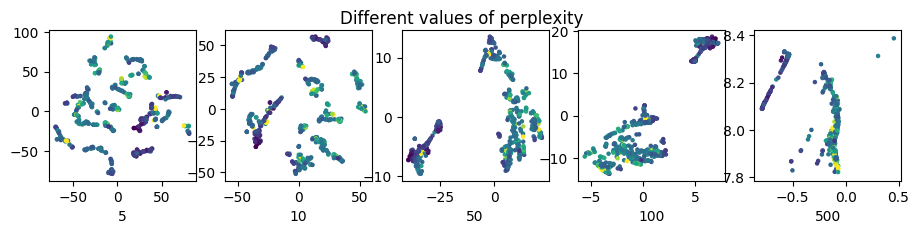

In [7]:
compute_plot_houses(houses)

# Tutorial on parameter tuning and benefits/drawbacks

[Check out this paper on distill](https://distill.pub/2016/misread-tsne/)